# Working with Joins in Python 

For my two variables I choose Freedom of the Expression vs. Political Stability with the abscence of Violence/ terrorism. In order to examine the relationship between the freedom of the expression within a country and its level of political stability. It will enable my to further analyse whether countries with greater freedom experience more stable political environments, or whether censorship and restrictions on media freedom are associated with increased political tensions or authoritarian regimes.

In [1]:
#As later we use large data frames and plots with lots of data points.

import warnings

# Filter out warnings
warnings.filterwarnings("ignore")

(a) Import each dataset into memory as a separate data frame, keeping all countries as your sample.

In [2]:
#Part A
import pandas as pd

# Load the dataset for freedom of expression
freedom_of_expression_df = pd.read_csv('fexpression_idea.csv')

# Load the dataset for political stability and absence of violence/terrorism
political_stability_df = pd.read_csv('pv_no_src.csv')

# Display the first few rows of the freedom of expression dataset
print("Freedom of Expression Dataset:")
print(freedom_of_expression_df.head())

# Display the first few rows of the political stability dataset
print("\nPolitical Stability Dataset:")
print(political_stability_df.head())

Freedom of Expression Dataset:
       country   1975   1976   1977   1978   1979   1980   1981   1982   1983  \
0  Afghanistan  35.80  35.80  35.80  23.10  21.70  21.70  27.50  25.40  27.50   
1       Angola  23.30  23.30  23.30  23.30  23.30  23.30  23.20  23.20  23.20   
2      Albania   4.28   4.28   4.28   4.28   4.28   4.28   4.24   4.24   4.24   
3          UAE  30.30  33.30  35.20  35.20  35.20  33.30  34.00  34.00  34.00   
4    Argentina  47.40  27.20  15.30  15.30  15.30  15.30  16.30  19.00  35.60   

   ...  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
0  ...  49.6  49.6  49.6  46.3  44.3  49.0  50.6  44.3  50.6  28.7  
1  ...  46.3  46.3  46.3  46.3  46.3  44.3  51.9  51.9  53.1  46.3  
2  ...  60.7  57.0  57.0  57.0  57.0  60.7  57.0  57.0  54.8  54.8  
3  ...  35.4  35.4  35.4  34.6  33.7  32.8  32.8  32.8  32.8  30.4  
4  ...  67.9  69.7  71.3  67.9  72.7  70.3  70.3  71.2  79.5  72.7  

[5 rows x 48 columns]

Political Stability Dataset:
       country 

(b) If data are not already stored in this way, please reshape data so that they consist of a single line
of data for each country and year.

In [3]:
# Reshape the freedom of expression data
freedom_of_expression_long = freedom_of_expression_df.melt(id_vars='country', var_name='year',
                                                           value_name='freedom_of_expression')

# Reshape the political stability data
political_stability_long = political_stability_df.melt(id_vars='country', var_name='year',
                                                       value_name='political_stability')

# Display the first few rows of the reshaped data
print("Reshaped Freedom of Expression Dataset:")
print(freedom_of_expression_long.head())

print("\nReshaped Political Stability Dataset:")
print(political_stability_long.head())

Reshaped Freedom of Expression Dataset:
       country  year  freedom_of_expression
0  Afghanistan  1975                  35.80
1       Angola  1975                  23.30
2      Albania  1975                   4.28
3          UAE  1975                  30.30
4    Argentina  1975                  47.40

Reshaped Political Stability Dataset:
       country  year  political_stability
0        Aruba  1996                  NaN
1  Afghanistan  1996                  2.0
2       Angola  1996                  4.0
3      Albania  1996                  3.0
4      Andorra  1996                  1.0


(c) Calculate the total number of countries observed in each data frame. Calculate the total number
of years observed in each data frame.

In [9]:
# Calculate the total number of countries:

#In the Freedom of Expression Data:
num_countries_freedom = freedom_of_expression_long['country'].nunique()
print("Total number of countries observed in Freedom of Expression dataset:", num_countries_freedom)

#In the Political Stability Data:
num_countries_stability = political_stability_long['country'].nunique()
print("Total number of countries observed in Political Stability dataset:", num_countries_stability)

# Calculate the total number of years:

#In the Freedom of Expression Data:
num_years_freedom = freedom_of_expression_long['year'].nunique()
print("\nTotal number of years observed in Freedom of Expression dataset:", num_years_freedom)

#In the Political Stability Data:
num_years_stability = political_stability_long['year'].nunique()
print("Total number of years observed in Political Stability dataset:", num_years_stability)

Total number of countries observed in Freedom of Expression dataset: 172
Total number of countries observed in Political Stability dataset: 205

Total number of years observed in Freedom of Expression dataset: 47
Total number of years observed in Political Stability dataset: 27


(d) Calculate the number of observations for which data is missing.

In [10]:
# Calculate the number of missing observations in the Freedom of Expression dataset
missing_freedom = freedom_of_expression_long.isnull().sum().sum()
print("Number of missing observations in Freedom of Expression dataset:", missing_freedom)

# Calculate the number of missing observations in the Political Stability dataset
missing_stability = political_stability_long.isnull().sum().sum()
print("Number of missing observations in Political Stability dataset:", missing_stability)

Number of missing observations in Freedom of Expression dataset: 457
Number of missing observations in Political Stability dataset: 715


(e) Join the two files by country and year so that you have single dataframe containing both variables.
Explain clearly what type of join this is, and carefully check that the number of observations
resulting from the join makes sense.

In [28]:
# Merge the two data frames by country and year
merged_df = pd.merge(freedom_of_expression_long, political_stability_long, on=['country', 'year'], how='inner')

# Display the merged data
print("Merged DataFrame:")
print(merged_df.head())

print("\nTotal number of countries in merged dataframe:", num_countries_merged)
print("Total number of years in merged dataframe:", num_years_merged)

#Since this is not as expected as part (c) found
#Total number of countries in Freedom of Expression dataset was 172 and in Political Stability dataset 205.
#Total number of years observed in Freedom of Expression dataset was 47 andin Political Stability dataset 27.

#Looking at this the meregd data set would be expected to contain 27 years and 172 countries, rather than 26 and 171.

# Check which countries are present in Freedom of Expression dataset but not in Political Stability dataset
countries_not_in_stability = freedom_of_expression_long[~freedom_of_expression_long['country'].isin(
    political_stability_long['country'])]['country'].unique()
print("\nCountries present in Freedom of Expression dataset but not in Political Stability dataset:", 
      countries_not_in_stability)

# Check which countries are present in Political Stability dataset but not in Freedom of Expression dataset
countries_not_in_freedom = political_stability_long[~political_stability_long['country'].isin(
    freedom_of_expression_long['country'])]['country'].unique()
print("\nCountries present in Political Stability dataset but not in Freedom of Expression dataset:",
      countries_not_in_freedom)

# Check which years are present in Freedom of Expression dataset but not in Political Stability dataset
years_not_in_stability = freedom_of_expression_long[~freedom_of_expression_long['year'].isin(
    political_stability_long['year'])]['year'].unique()
print("\nYears present in Freedom of Expression dataset but not in Political Stability dataset:",
      years_not_in_stability)

# Check which years are present in Political Stability dataset but not in Freedom of Expression dataset
years_not_in_freedom = political_stability_long[~political_stability_long['year'].isin(
    freedom_of_expression_long['year'])]['year'].unique()
print("Years present in Political Stability dataset but not in Freedom of Expression dataset:",
      years_not_in_freedom)

Merged DataFrame:
       country  year  freedom_of_expression  political_stability
0  Afghanistan  1996                   10.4                  2.0
1       Angola  1996                   36.3                  4.0
2      Albania  1996                   58.7                  3.0
3          UAE  1996                   42.3                  4.0
4    Argentina  1996                   73.4                  4.0

Total number of countries in merged dataframe: 171
Total number of years in merged dataframe: 26

Countries present in Freedom of Expression dataset but not in Political Stability dataset: ['Taiwan']

Countries present in Political Stability dataset but not in Freedom of Expression dataset: ['Aruba' 'Andorra' 'American Samoa' 'Antigua and Barbuda' 'Bahamas'
 'Belize' 'Bermuda' 'Brunei' 'Cayman Islands' 'Dominica'
 'Micronesia, Fed. Sts.' 'Grenada' 'Greenland' 'Guam' 'Hong Kong, China'
 'Kiribati' 'St. Kitts and Nevis' 'Kosovo' 'St. Lucia' 'Liechtenstein'
 'Macao, China' 'Monaco' 'Mars

I used the 'pd.merge()' function to combine the 'freedom_of_expression' and 'political_stability' data frames, specifying 'country' and 'year' as the columns to join on through the 'on' parameter. By setting 'how='inner'', we ensured that only rows with matching values in both data frames based on the specified columns were included in the resulting 'merged_df'. Prior to executing the join, it was important to verify that the number of unique countries and years in the resulting merged dataframe aligned with expectations. Given that an inner join was performed, the number of observations in the merged dataframe should not surpass the minimum number observed in either of the original data frames. Hence, by then checking the number of years and countries in the 'merged_df' I could see that was the case.

To give greater insight the merged data frame showed slightly less countries and years than the minimum number seen in either data frame so I explored why this was the case. The merged data frame contains data from 171 unique countries, which is slightly less than the total number of countries observed in the Freedom of Expression dataset (172). This discrepancy arises because the country "Taiwan" is present in the Freedom of Expression dataset but not in the Political Stability dataset. Also, the merged data frame contains data for 26 unique years, which is slightly less than the total number of years observed in the Political Stability dataset (27). This discrepancy arises because the year "2022" is present in the Political Stability dataset but not in the Freedom of Expression dataset. Overall, these differences in the number of unique countries and years between the original datasets and the merged data frame are consistent with the expectation of performing an inner join, which retains only the rows where there is a match in both datasets based on the specified columns ('country' and 'year').

# 4. Creating Knowledge from Data - Analysis of Freedom of Expression and Political Stability 

In [46]:
# Show missing values in merged_df
missing_values = merged_df.isnull().sum()
print("Missing Values in merged_df:")
display(missing_values)

Missing Values in merged_df:


country                    0
year                       0
freedom_of_expression     31
political_stability      534
dtype: int64

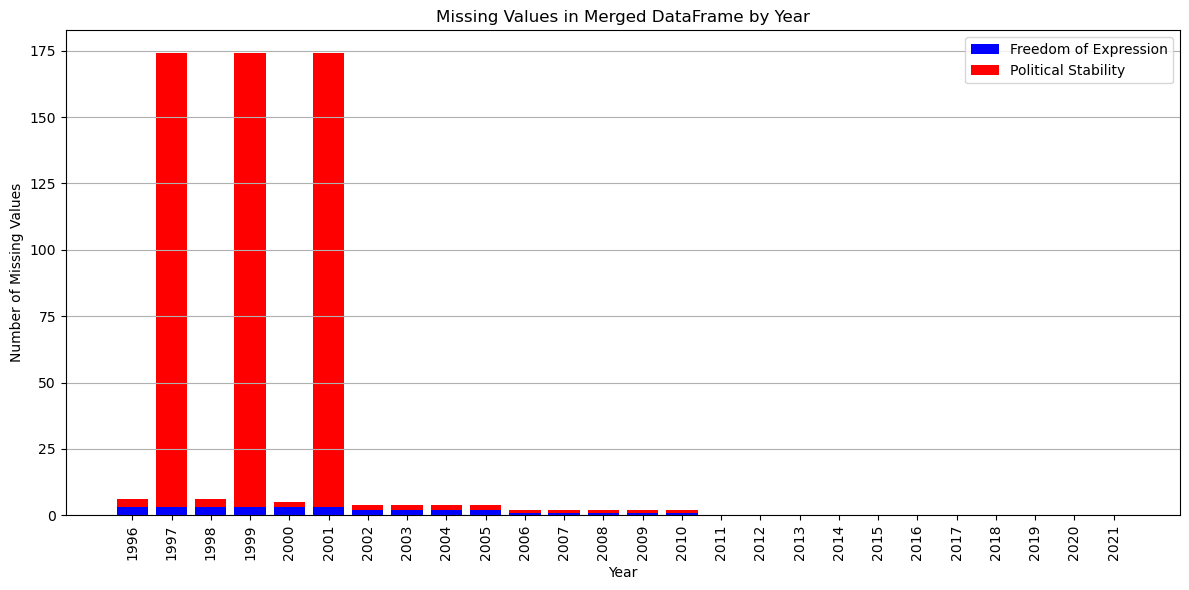

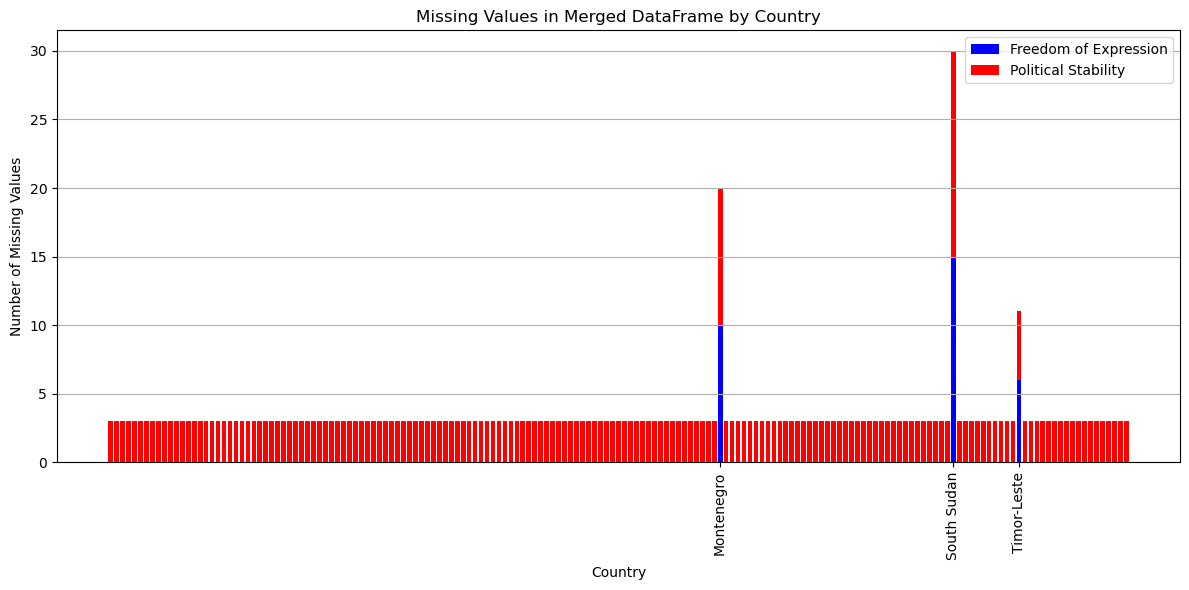

In [48]:
#To visually demonstrate this data
import matplotlib.pyplot as plt

# Get the missing values counts for each year
missing_values_year = merged_df.groupby('year').apply(lambda x: x.isnull().sum())

# Get the missing values counts for each country
missing_values_country = merged_df.groupby('country').apply(lambda x: x.isnull().sum())
countries_to_label = missing_values_country[missing_values_country.sum(axis=1) > 10].index

# Plotting for missing values by year
plt.figure(figsize=(12, 6))
plt.bar(missing_values_year.index, missing_values_year['freedom_of_expression'],
        color='blue', label='Freedom of Expression')
plt.bar(missing_values_year.index, missing_values_year['political_stability'],
        bottom=missing_values_year['freedom_of_expression'], color='red', label='Political Stability')
plt.title('Missing Values in Merged DataFrame by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting for missing values by country
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_values_country)), missing_values_country['freedom_of_expression'],
        color='blue', label='Freedom of Expression')
plt.bar(range(len(missing_values_country)), missing_values_country['political_stability'],
        bottom=missing_values_country['freedom_of_expression'], color='red', label='Political Stability')
plt.title('Missing Values in Merged DataFrame by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(axis='y')
plt.xticks([i for i, country in enumerate(missing_values_country.index) if country in countries_to_label],
           [country for i, country in enumerate(missing_values_country.index) if country in countries_to_label],
           rotation=90)
plt.tight_layout()
plt.show()


From the graphs plotted, it's evident that missing values in the years 1997, 1999, and 2001 are notably prominent. These gaps could stem from a myriad of factors, including incomplete data collection processes, political unrest leading to disruptions in data reporting, or changes in methodologies for data collection during those years. Conversely, the stark absence of missing data post-2010 suggests enhancements in data collection and reporting practices over time.

When scrutinizing missing values in the merged dataframe by country, South Sudan emerges with the highest number of missing values, followed closely by Montenegro and East Timor. These disparities can be attributed to specific challenges faced by each country:

In South Sudan, collecting high-quality data encounters severe hurdles due to security constraints and some of the world's most challenging logistical conditions. Ongoing conflicts have precipitated reduced harvests, exacerbating food shortages and escalating incidents of poaching and cattle theft, further fueling unrest. Economic downturns, spurred by plummeting oil prices and the COVID-19 pandemic, have compounded the hunger crisis, exacerbating data collection challenges since gaining independence in 2011.

Montenegro grappled with unstable political developments in 2022, eroding the legitimacy of key institutions and impeding ministerial coordination, thus undermining the integrity of the data collection system. The political landscape, dominated by a caretaker government, intensified governance challenges, affecting the reliability of datasets.

East Timor's struggles with poor governance, accountability deficits, and lack of transparency have hindered its efforts to break free from poverty. Its low Corruption Perceptions Index ranking reflects difficulties in combatting corruption and ensuring good governance. Despite strides since gaining independence in 2002, heavy reliance on oil and gas revenues poses risks of economic instability, accentuating challenges associated with depleted resources.

The disparity in missing observations between political stability and freedom of expression underscores the sensitivity and complexity of measuring political stability, particularly in regions with authoritarian regimes or civil unrest. The substantial number of missing observations in political stability (534) compared to freedom of expression (31) underscores challenges in data collection and reporting, highlighting potential biases in our analysis.

The presence of missing data can significantly compromise the accuracy and reliability of statistical analysis and subsequent conclusions. Such gaps can introduce bias and diminish the representativeness of the sample, potentially skewing the relationships between variables. In our analysis, missing observations in the Freedom of Expression and Political Stability datasets may distort the true associations between these variables, necessitating cautious interpretation of results.

Addressing missing data requires careful consideration of its nature and extent. Various methods such as imputation techniques, data interpolation, or exclusion of observations with missing data can be employed. However, the appropriateness of each method should be critically evaluated to mitigate potential impacts on the validity of results and conclusions. Transparent reporting of methods used to handle missing data is imperative for ensuring the robustness and reproducibility of research findings. Additionally, ongoing monitoring and evaluation of data collection processes are essential for enhancing data quality and reliability in future analyses.

In [49]:
#Analysing key statistics:

# Summary statistics for Freedom of Expression
mean_freedom = freedom_of_expression_long['freedom_of_expression'].mean()
median_freedom = freedom_of_expression_long['freedom_of_expression'].median()
std_dev_freedom = freedom_of_expression_long['freedom_of_expression'].std()
min_freedom = freedom_of_expression_long['freedom_of_expression'].min()
max_freedom = freedom_of_expression_long['freedom_of_expression'].max()

# Summary statistics for Political Stability
mean_stability = political_stability_long['political_stability'].mean()
median_stability = political_stability_long['political_stability'].median()
std_dev_stability = political_stability_long['political_stability'].std()
min_stability = political_stability_long['political_stability'].min()
max_stability = political_stability_long['political_stability'].max()

# Display the summary statistics
print("Summary Statistics for Freedom of Expression:")
print("Mean:", mean_freedom)
print("Median:", median_freedom)
print("Standard Deviation:", std_dev_freedom)
print("Minimum:", min_freedom)
print("Maximum:", max_freedom)

print("\nSummary Statistics for Political Stability:")
print("Mean:", mean_stability)
print("Median:", median_stability)
print("Standard Deviation:", std_dev_stability)
print("Minimum:", min_stability)
print("Maximum:", max_stability)

Summary Statistics for Freedom of Expression:
Mean: 52.86546925396617
Median: 53.1
Standard Deviation: 20.477226268219468
Minimum: 0.0
Maximum: 100.0

Summary Statistics for Political Stability:
Mean: 5.525726141078838
Median: 6.0
Standard Deviation: 2.189971765806325
Minimum: 1.0
Maximum: 10.0


The summary statistics offer valuable insights into the distribution and characteristics of both freedom of expression and political stability across various countries and years. For freedom of expression, the mean value of approximately 52.87 suggests an average level of expression, with a median of 53.1 indicating a balanced distribution around this central tendency. The standard deviation of approximately 20.48 signifies considerable variability around the mean, highlighting the diversity in levels of expression. Similarly, for political stability, the mean of 5.53 and median of 6.0 depict a moderate level of stability, with a standard deviation of about 2.19 indicating some degree of dispersion in stability levels. The minimum and maximum values provide context, showing the range of experiences from minimal to maximal expression and stability.

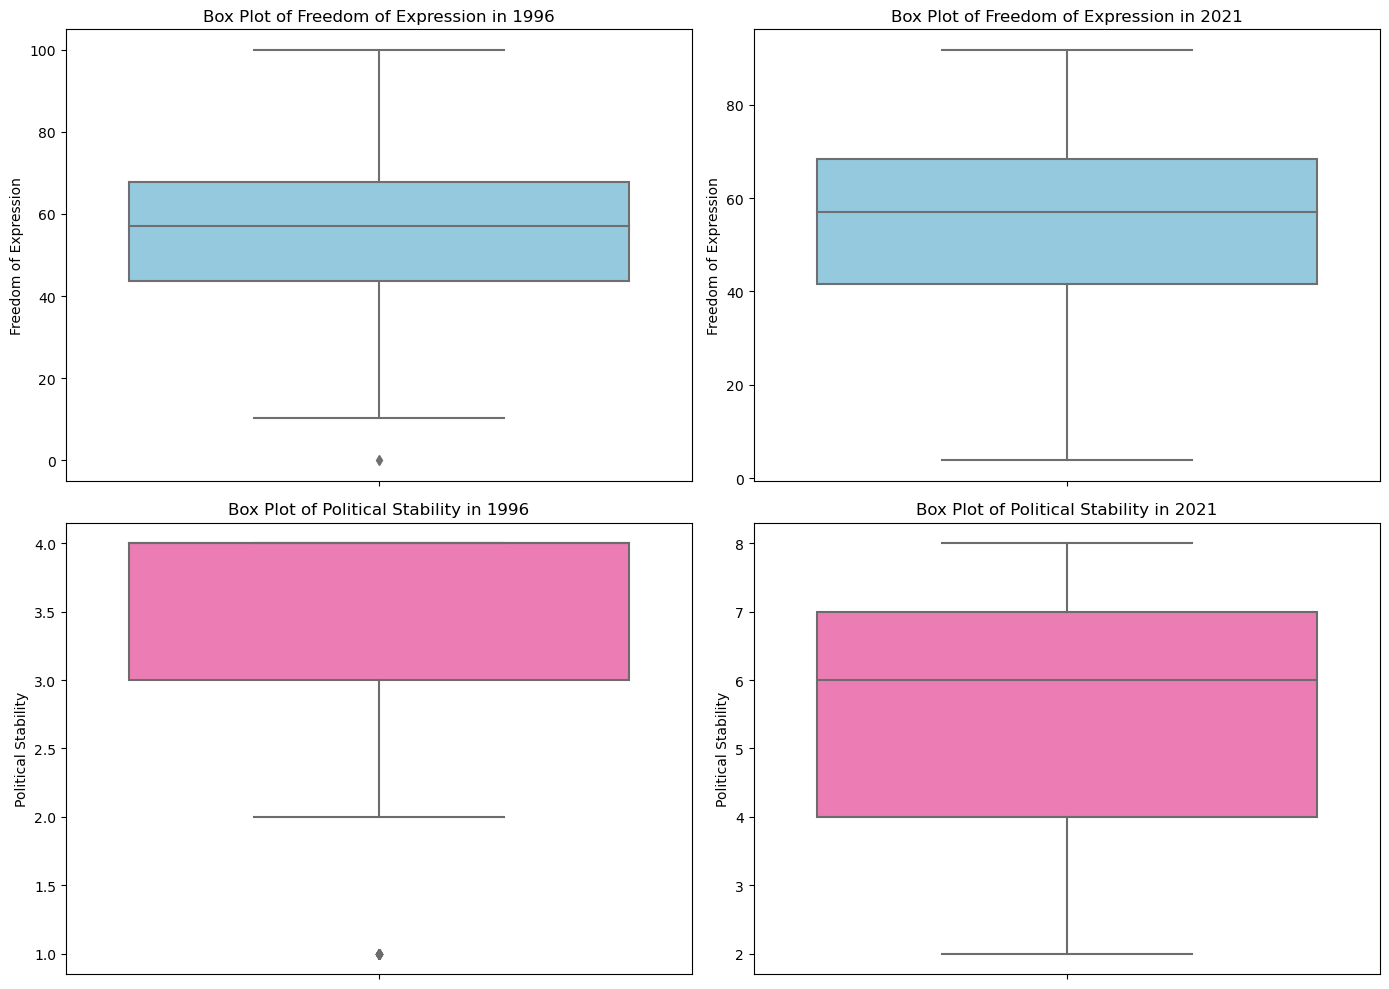

In [59]:
#Comparing Key statistics from 1996 and 2021

# Filter data for the years 1996 and 2021
freedom_1996 = freedom_of_expression_long[freedom_of_expression_long['year'] == '1996']
freedom_2021 = freedom_of_expression_long[freedom_of_expression_long['year'] == '2021']

stability_1996 = political_stability_long[political_stability_long['year'] == '1996']
stability_2021 = political_stability_long[political_stability_long['year'] == '2021']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Box plots for Freedom of Expression in 1996 and 2021
sns.boxplot(data=freedom_1996, y='freedom_of_expression', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Freedom of Expression in 1996')
axs[0, 0].set_ylabel('Freedom of Expression')

sns.boxplot(data=freedom_2021, y='freedom_of_expression', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Freedom of Expression in 2021')
axs[0, 1].set_ylabel('Freedom of Expression')

# Box plots for Political Stability in 1996 and 2021
sns.boxplot(data=stability_1996, y='political_stability', color='hotpink', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Political Stability in 1996')
axs[1, 0].set_ylabel('Political Stability')

sns.boxplot(data=stability_2021, y='political_stability', color='hotpink', ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Political Stability in 2021')
axs[1, 1].set_ylabel('Political Stability')

plt.tight_layout()
plt.show()

Comparing the key statistics from 1996 and 2021 across all countries, we observe notable differences in the freedom of expression and political stability metrics. In 1996, the anomalous presence of a value at 0 in freedom of expression suggests potential data discrepancies or extreme limitations on expression in certain countries during that period. Additionally, the smaller interquartile range and lower mean in 1996 compared to 2021 indicate a generally lower level of freedom of expression back then. However, the upper range in both years suggests that some countries experienced high levels of freedom of expression. Interestingly, the wider range in 2021 implies greater disparities in freedom of expression compared to 1996, which could be attributed to global socio-political changes, technological advancements, or evolving media landscapes.

Turning to political stability, the analysis unveils significant differences between 1996 and 2021. In 1996, the highest level of political stability experienced was 4, contrasting sharply with the peak of 8 in 2021. This suggests notable improvements or shifts in stability dynamics over the years. The anomalous value at 1 in 1996 might indicate instances of particularly low stability in certain regions during that period. Moreover, the smaller range of political stability in 1996 compared to 2021 implies a more restricted spectrum of stability experiences back then. Conversely, the wider range in 2021 reflects greater variability in political stability, potentially influenced by geopolitical shifts, governance reforms, or socio-economic factors. Additionally, the higher mean of political stability in 2021 indicates an overall increased level of stability compared to 1996, signaling potential advancements in governance practices or international relations.

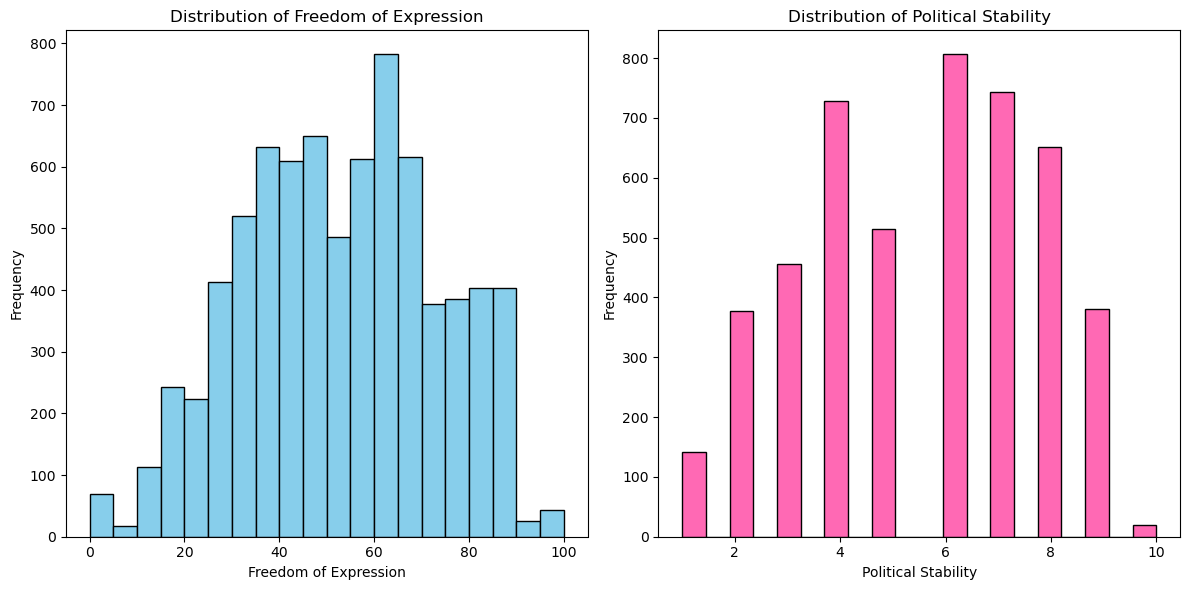

In [60]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram for Freedom of Expression
axes[0].hist(freedom_of_expression_long['freedom_of_expression'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Freedom of Expression')
axes[0].set_xlabel('Freedom of Expression')
axes[0].set_ylabel('Frequency')

# Plot histogram for Political Stability
axes[1].hist(political_stability_long['political_stability'], bins=20, color='hotpink', edgecolor='black')
axes[1].set_title('Distribution of Political Stability')
axes[1].set_xlabel('Political Stability')
axes[1].set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

Upon examining the histograms, it becomes evident that both freedom of expression and political stability exhibit distributions resembling bell curves, indicating a relatively symmetric spread of values. For freedom of expression, the most frequent scores cluster around the 60-65 range, signifying a prevalence of moderate to high levels of freedom of expression across numerous countries. Conversely, political stability's histogram shows a peak at a score of 6, indicating that many countries experience moderate levels of stability and absence of violence or terrorism. Despite these concentrations, both distributions span the full range of possible values, illustrating significant variability among countries. These observations offer valuable insights into the distributional patterns of both variables across all countries and years, revealing the prevalence of moderate values alongside notable outliers in each dataset. Overall, these histograms provide a clear visualisation of the distribution of freedom of expression and political stability, but giove a very broud picture, so for the next bit of analysis we will delve into specific years.

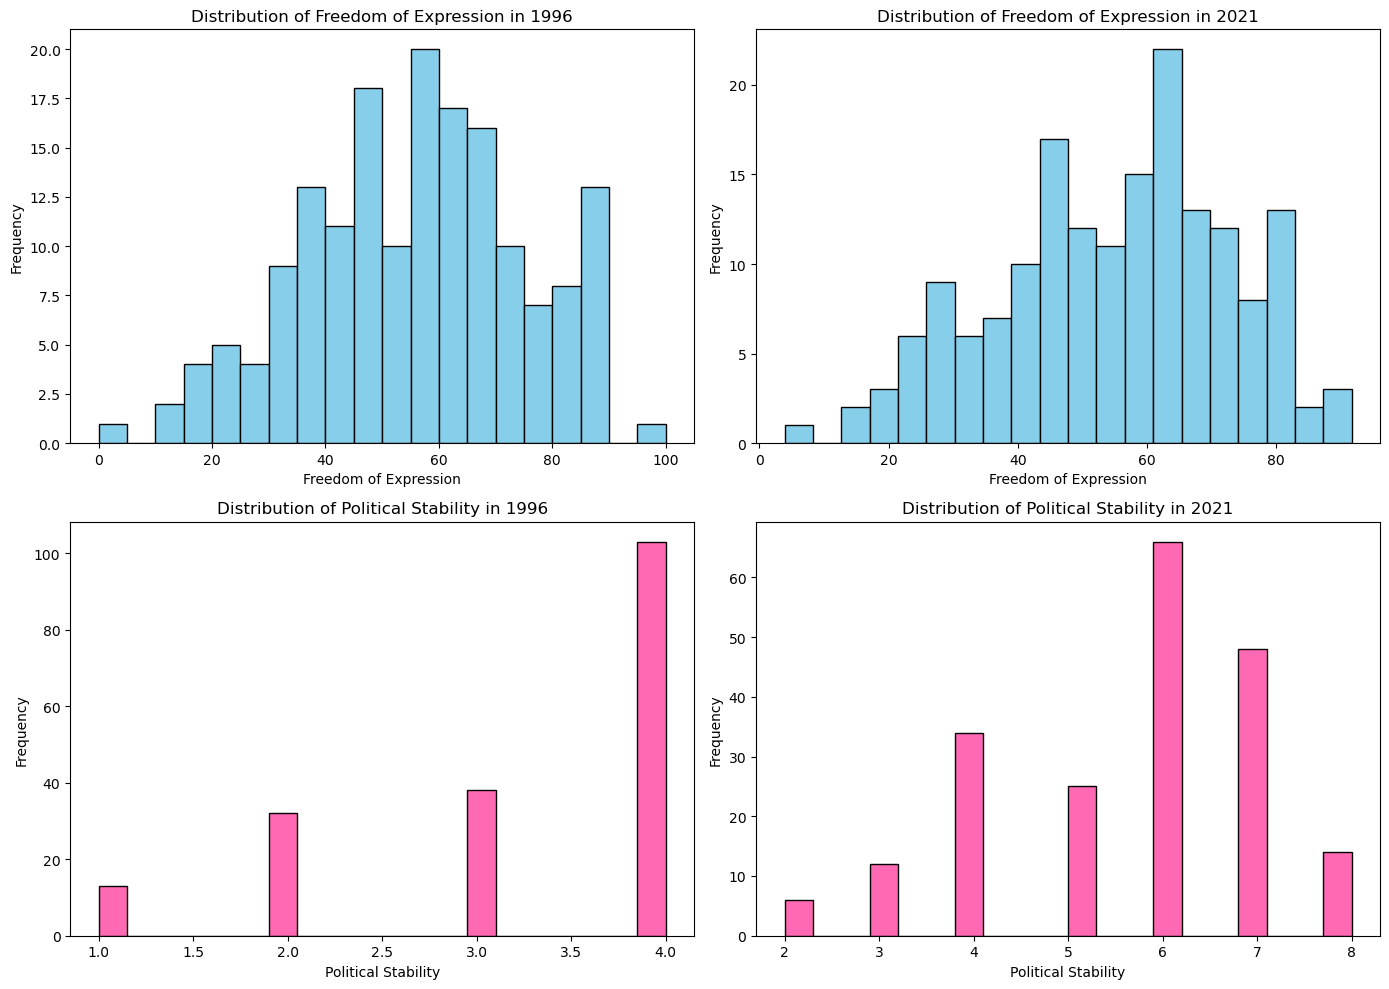

In [69]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Freedom of Expression in 1996
axs[0, 0].hist(freedom_1996['freedom_of_expression'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Freedom of Expression in 1996')
axs[0, 0].set_xlabel('Freedom of Expression')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Freedom of Expression in 2021
axs[0, 1].hist(freedom_2021['freedom_of_expression'], bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of Freedom of Expression in 2021')
axs[0, 1].set_xlabel('Freedom of Expression')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Political Stability in 1996
axs[1, 0].hist(stability_1996['political_stability'], bins=20, color='hotpink', edgecolor='black')
axs[1, 0].set_title('Distribution of Political Stability in 1996')
axs[1, 0].set_xlabel('Political Stability')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Political Stability in 2021
axs[1, 1].hist(stability_2021['political_stability'], bins=20, color='hotpink', edgecolor='black')
axs[1, 1].set_title('Distribution of Political Stability in 2021')
axs[1, 1].set_xlabel('Political Stability')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Beginning with the Distribution of Freedom of Expression, both histograms exhibit a bell-shaped curve slightly skewed to the right, suggesting a predominantly symmetric distribution of values. In 1996, the peak frequency occurs within the range of 55-60, while in 2021, the peak shifts slightly to the right, with the highest frequency observed within the range of 60-65. This shift indicates a potential increase in the level of freedom of expression globally over time. The broader spread of values in 2021 compared to 1996 suggests greater variability in freedom of expression across countries in recent years, potentially reflecting changes in socio-political dynamics and advancements in technology facilitating communication and expression.

Turning to the Distribution of Political Stability, distinct patterns emerge between the two years. In 1996, the histogram shows a skewed distribution with a peak frequency occurring at a lower stability level, around 4. This suggests that many countries experienced moderate levels of political stability at that time, with fewer outliers exhibiting extreme levels of stability. In contrast, the histogram for 2021 displays a more even distribution, with the peak frequency observed at a higher stability level, around 6. This shift towards higher stability levels indicates a general improvement in political stability globally over the past few decades. The broader distribution in 2021 suggests that more countries now experience relatively higher levels of political stability compared to 1996, reflecting advancements in governance, diplomacy, and conflict resolution efforts worldwide.

In conclusion, the histograms provide valuable insights into the changing landscape of freedom of expression and political stability over time. The observed shifts in distribution patterns between 1996 and 2021 suggest notable trends towards increased freedom of expression and improved political stability across countries, highlighting the evolving nature of global socio-political dynamics.

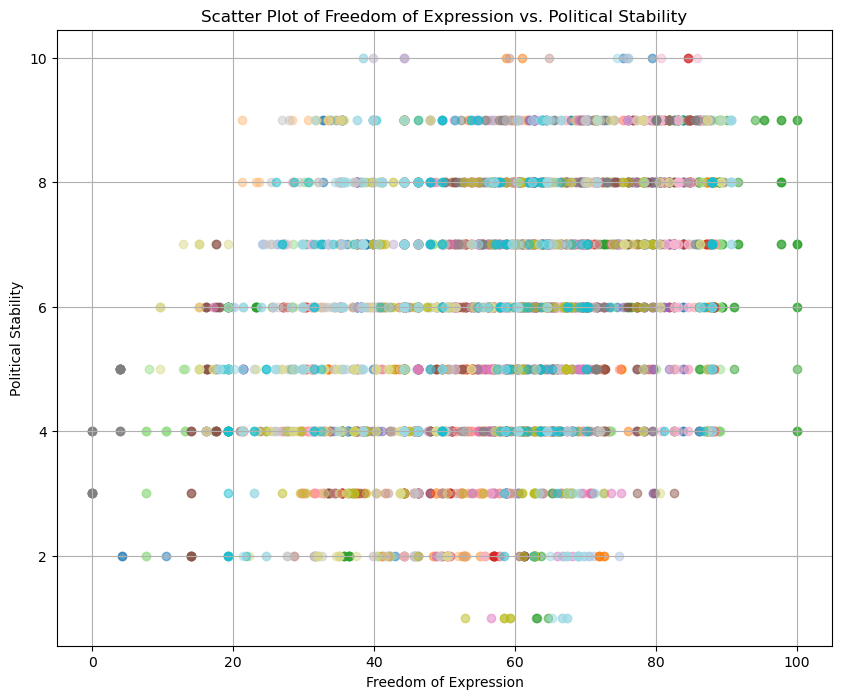

In [73]:
import numpy as np

# Get unique countries
unique_countries = merged_df['country'].unique()

# Create a color map with a unique color for each country
color_map = plt.cm.get_cmap('tab20', len(unique_countries))

# Create scatter plot with different colors for each country
plt.figure(figsize=(10, 8))
for i, country in enumerate(unique_countries):
    country_data = merged_df[merged_df['country'] == country]
    plt.scatter(country_data['freedom_of_expression'], country_data['political_stability'], 
                color=color_map(i), label=country, alpha=0.5)

plt.title('Scatter Plot of Freedom of Expression vs. Political Stability')
plt.xlabel('Freedom of Expression')
plt.ylabel('Political Stability')
#plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show plot
plt.show()

The scatter plot serves as a comprehensive visualization of our dataset, with each dot representing a specific country and corresponding year, illustrating the relationship between freedom of expression and political stability. While the plot provides a broad overview, further analysis can yield deeper insights.

Notably, we observe distinct patterns within the plot's quadrants. For instance, in the top-left corner, where countries receive high political stability scores (ranging from 8 to 10), none exhibit low levels of freedom of expression (ranging from 0 to 20). Conversely, in the bottom-right section, where countries display low political stability scores (ranging from 0 to 2), none achieve high levels of freedom of expression (ranging from 80 to 100). This observation underscores a reciprocal relationship: countries with greater political stability tend to experience enhanced freedom of expression, and vice versa.

The majority of data points cluster around the center, suggesting a prevalent trend. Additionally, there's a progression towards the right side of the plot, indicating that as freedom of expression increases, political stability tends to improve slightly. However, a closer examination of the data is necessary to discern the nuances of this relationship.

Furthermore, the plot reveals outliers—instances where certain countries exhibit extreme values. For example, one country in a specific year attained a freedom of expression score of 100, yet registered a political stability score of only 4. These outliers warrant closer scrutiny as they may offer insights into exceptional circumstances or anomalies within the dataset.

In summary, while the scatter plot offers a comprehensive overview, a deeper exploration is needed to unravel the intricate dynamics between freedom of expression and political stability, including an analysis of outliers and closer examination of data clusters.

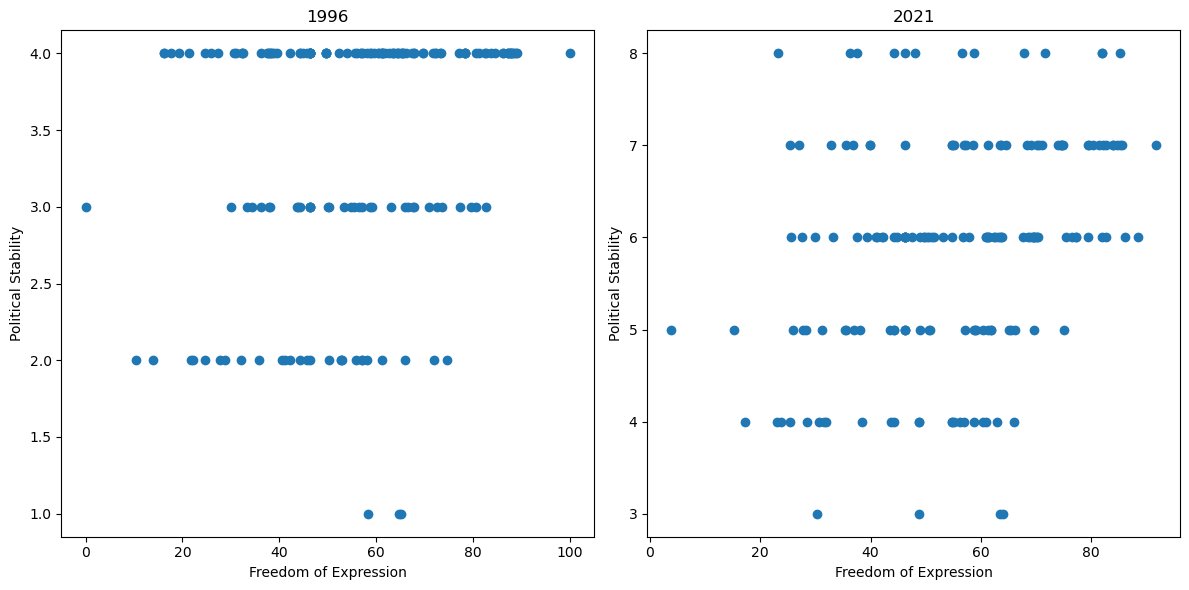

In [79]:
# Filter data for the year 1996
data_1996 = merged_df[merged_df['year'] == '1996']

data_2021 = merged_df[merged_df['year'] == '2020']

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the year 1996
axes[0].scatter(data_1996['freedom_of_expression'], data_1996['political_stability'])
axes[0].set_title('1996')
axes[0].set_xlabel('Freedom of Expression')
axes[0].set_ylabel('Political Stability')

# Plot for the year 2021
axes[1].scatter(data_2021['freedom_of_expression'], data_2021['political_stability'])
axes[1].set_title('2021')
axes[1].set_xlabel('Freedom of Expression')
axes[1].set_ylabel('Political Stability')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

The scatter plot comparing Political Stability and Freedom of Expression in 1996 reveals a lack of clear correlation between the two variables. Overall, political stability remains relatively low, with the highest stability score reaching only 4. Interestingly, some countries exhibit a political stability score of 4 despite having a low freedom of expression score, often below 20.

In contrast, the scatter plot for 2021 data hints at a slight correlation, indicating a shift towards the right. This suggests a potential positive relationship between freedom of expression and political stability—countries with higher freedom of expression tend to experience greater political stability. However, this correlation is not particularly strong, as many countries do not follow this trend, perhaps due to various socio-political factors.

Additionally, there are notable outliers in the 2021 data, particularly for freedom of expression scores above 60, where political stability scores drop to only 3. This indicates instances where high levels of freedom of expression do not necessarily translate to higher political stability, suggesting complexities in the relationship between these variables. Further analysis is required to understand the underlying factors contributing to these outliers and the observed trends. 

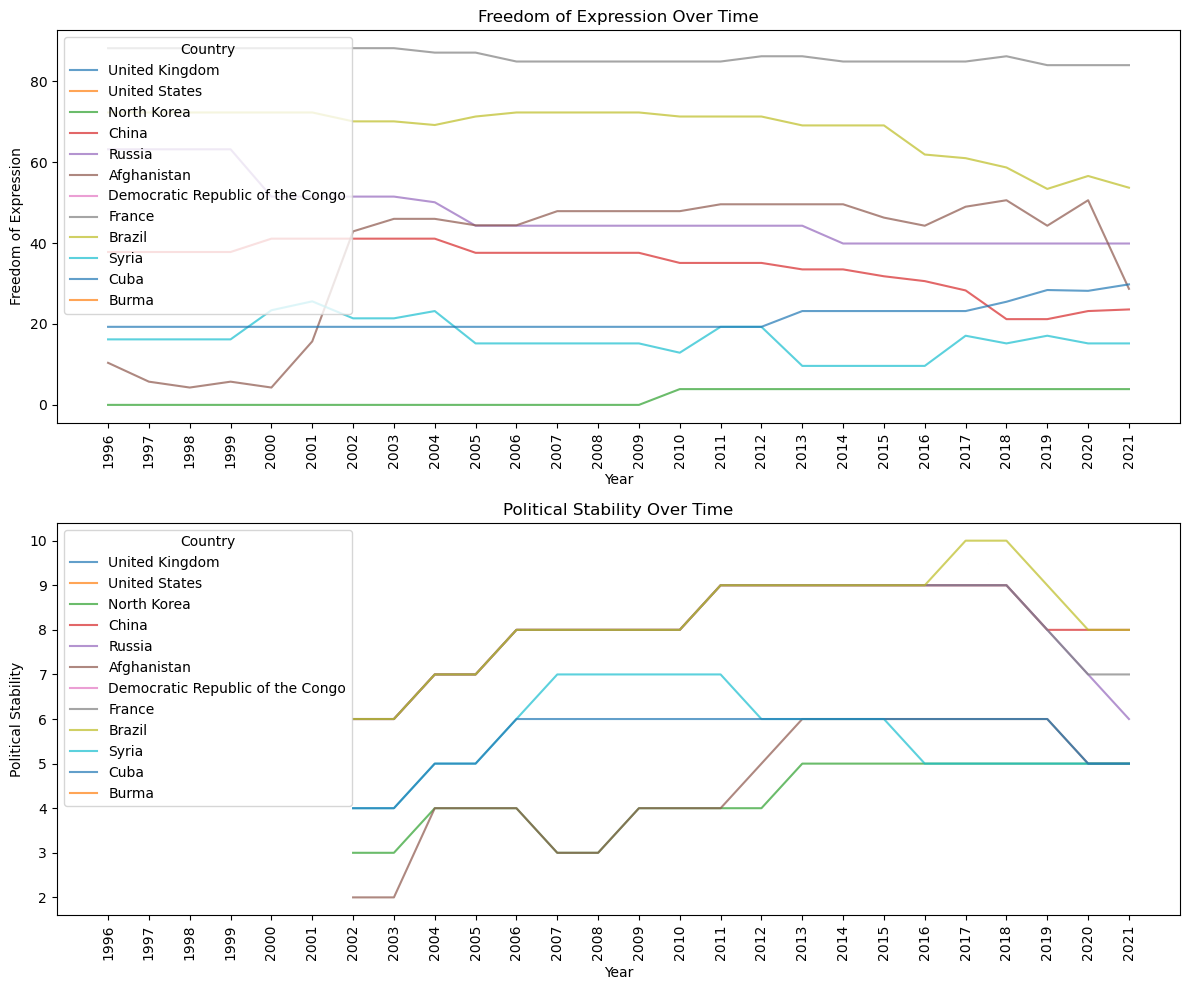

In [80]:
# List of selected countries
selected_countries = ['United Kingdom', 'United States', 'North Korea', 'China', 'Russia', 
                      'Afghanistan', 'Democratic Republic of the Congo', 'France', 
                      'Brazil', 'Syria', 'Cuba', 'Burma']

# Filter the merged dataset to include only the selected countries
selected_merged_df = merged_df[merged_df['country'].isin(selected_countries)]

# Create two line plots with vertical x-axis labels
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot line plot for Freedom of Expression
for country in selected_countries:
    country_data = selected_merged_df[selected_merged_df['country'] == country]
    axes[0].plot(country_data['year'], country_data['freedom_of_expression'], label=country, alpha=0.7)

axes[0].set_title('Freedom of Expression Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Freedom of Expression')
axes[0].legend(title='Country')
axes[0].tick_params(axis='x', rotation=90)

# Plot line plot for Political Stability
for country in selected_countries:
    country_data = selected_merged_df[selected_merged_df['country'] == country]
    axes[1].plot(country_data['year'], country_data['political_stability'], label=country, alpha=0.7)

axes[1].set_title('Political Stability Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Political Stability')
axes[1].legend(title='Country')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


From the plotted data, it's evident that Freedom of Expression remains relatively stable over time across most countries, with minimal variation reflected in the mostly flat lines. However, there's a significant spike observed in Afghanistan around 2001, coinciding with increased international involvement during the conflict. This surge in freedom of expression may be attributed to various factors, including the influx of troops and shifting power dynamics amid the turbulent conflict. Conversely, Afghanistan experiences a notable decline in freedom of expression around 2020, possibly linked to emerging challenges or changes in governance. Additionally, Brazil shows a distinct decline in freedom of expression post-2015, potentially influenced by shifts in political leadership or socio-economic factors.

Examining Political Stability over time reveals an overall upward trend, indicating a gradual improvement in stability across nations. However, notable observations stand out, such as Russia's sharp decline post-2018. This decline could be associated with significant political events, such as the Central Election Commission's decision to ban opposition leader Aleksey Navalny from challenging Putin in the 2018 presidential election, leading to increased tensions and instability in the region. 

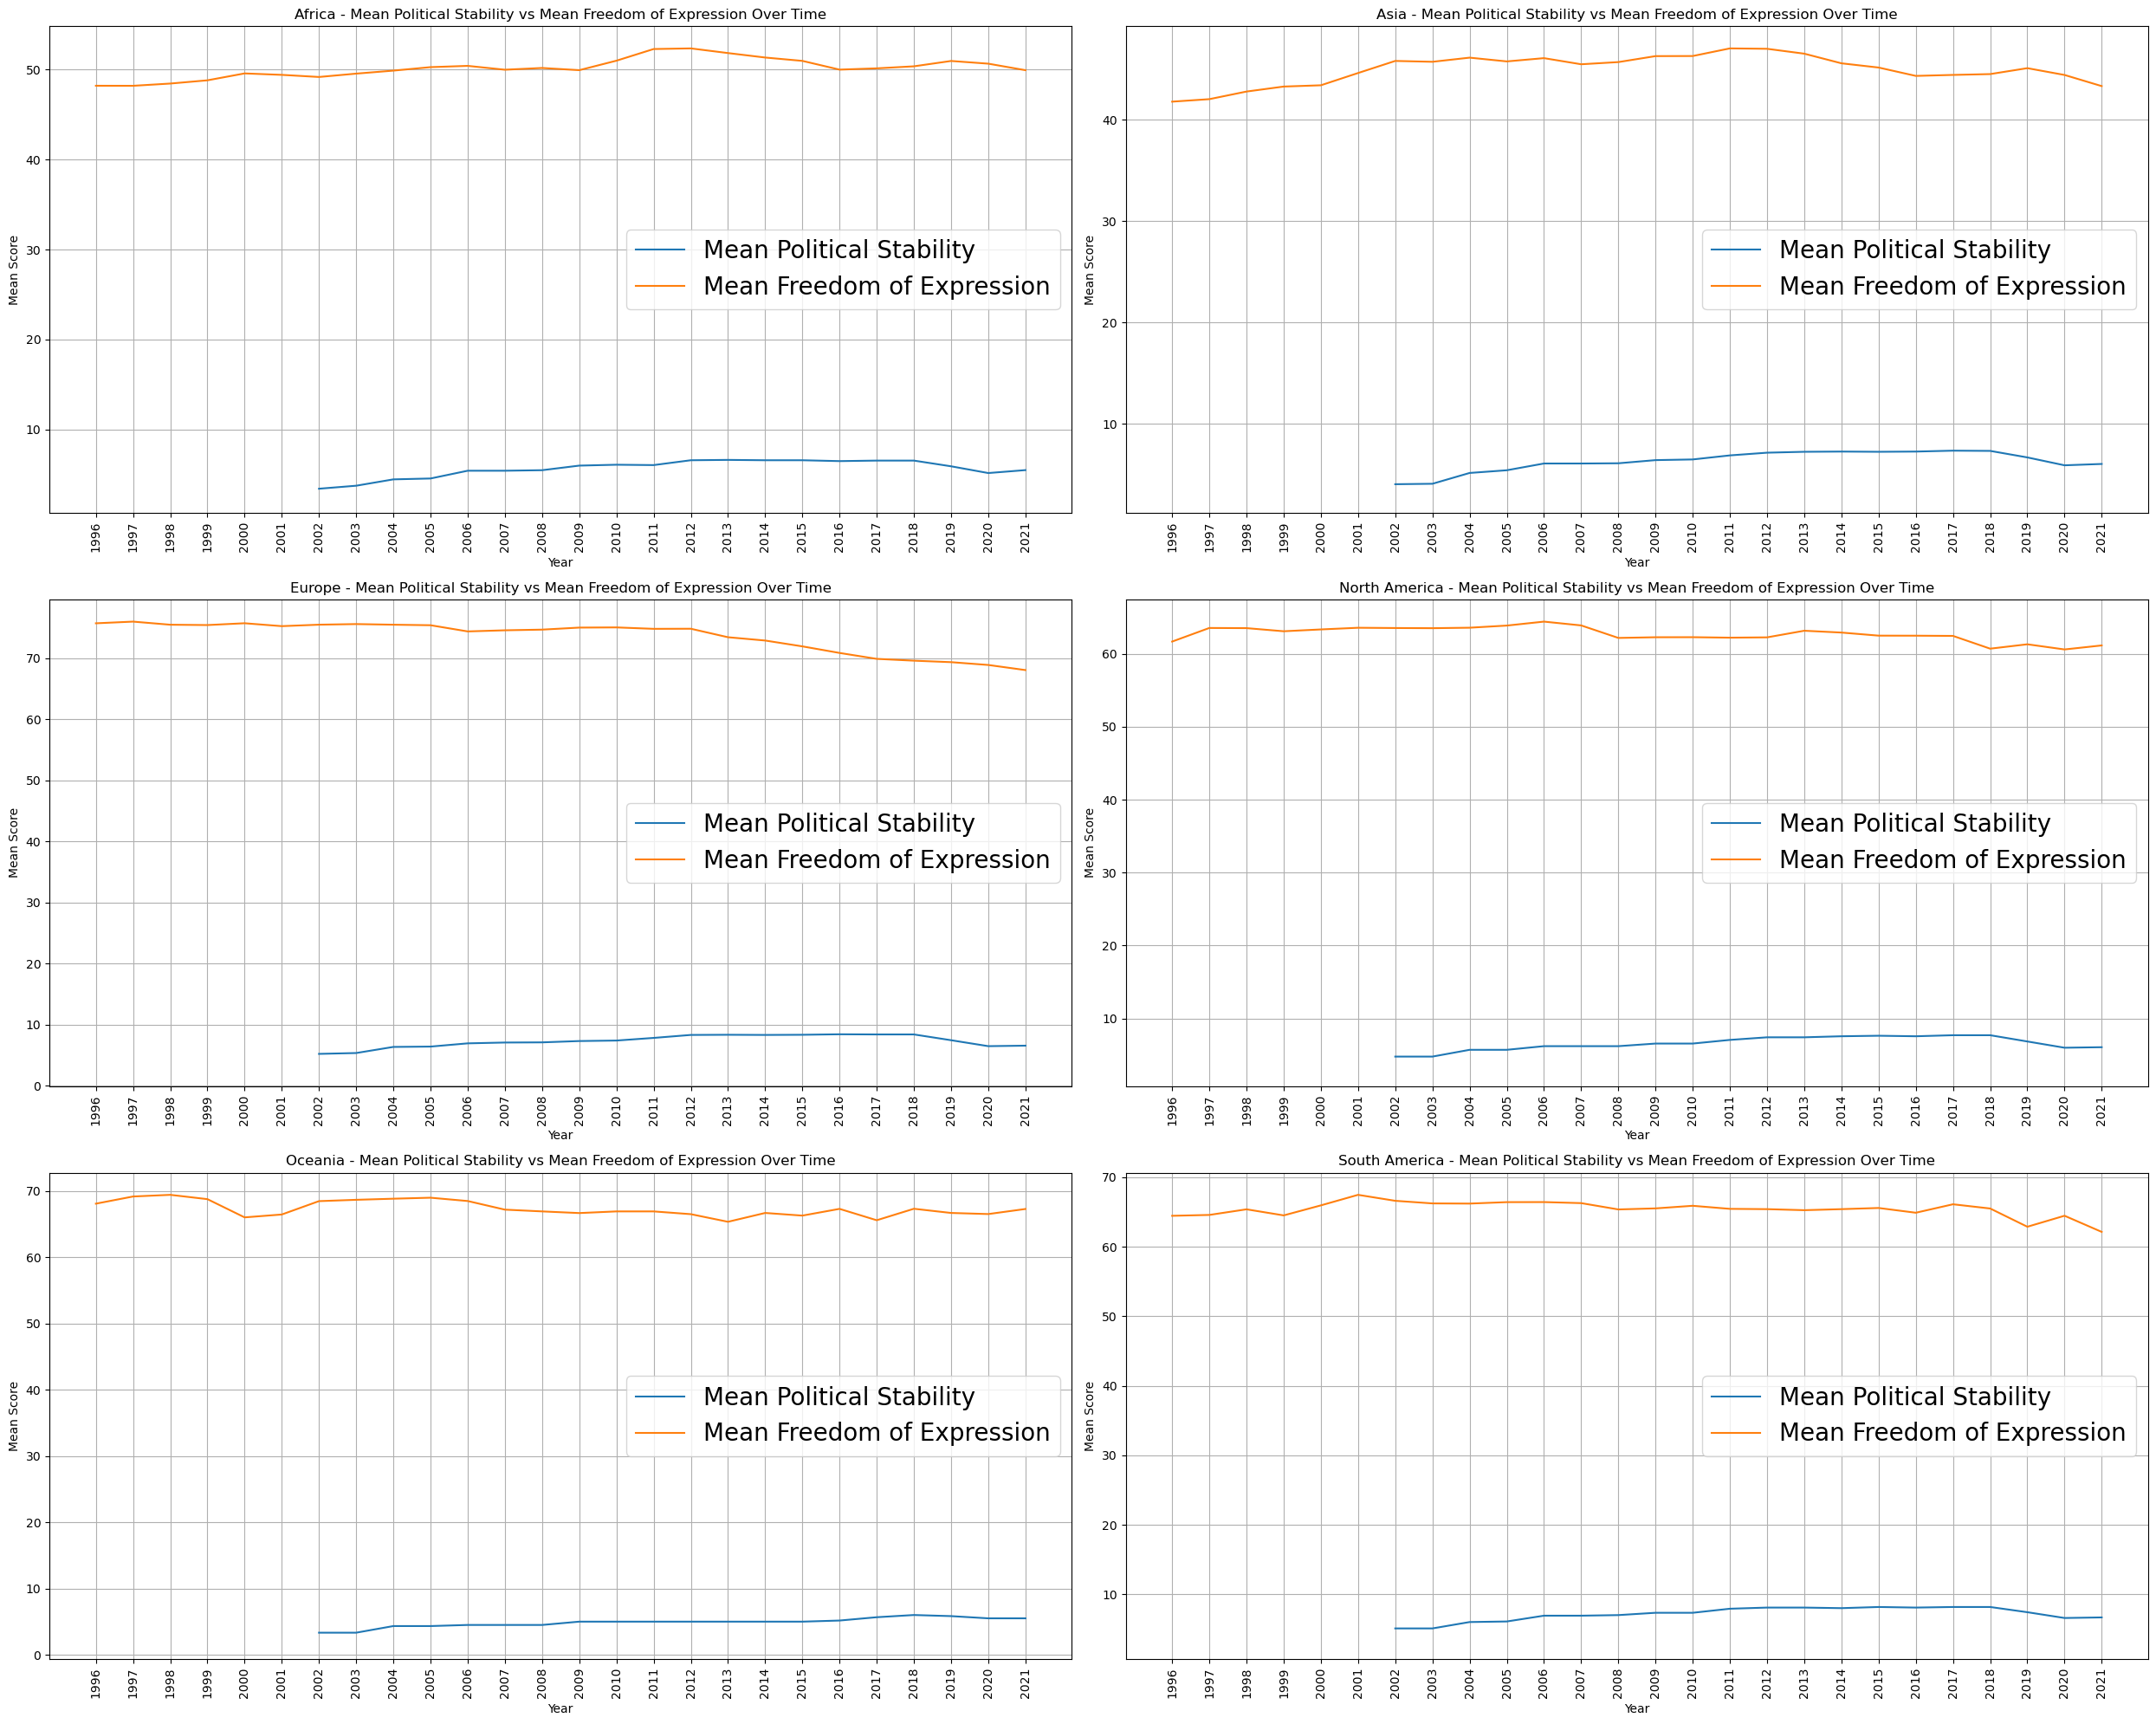

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Define regions based on continents
regions = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
}

# Create a DataFrame to map countries to regions
country_to_region = {}
for region, countries in regions.items():
    for country in countries:
        country_to_region[country] = region

# Map countries to regions in the original DataFrame
merged_df['region'] = merged_df['country'].map(country_to_region)

# Group the merged DataFrame by year and region, and calculate mean political stability and freedom of expression
region_yearly_means = merged_df.groupby(['year', 'region']).agg({
    'political_stability': 'mean',
    'freedom_of_expression': 'mean'
}).reset_index()

# Create a 2 by 3 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(25, 20))

# Plot mean political stability vs mean freedom of expression for each region over time
for i, (region, ax) in enumerate(zip(regions.keys(), axes.flatten())):
    region_data = region_yearly_means[region_yearly_means['region'] == region]
    ax.plot(region_data['year'], region_data['political_stability'], label='Mean Political Stability')
    ax.plot(region_data['year'], region_data['freedom_of_expression'], label='Mean Freedom of Expression')
    ax.set_title(f'{region} - Mean Political Stability vs Mean Freedom of Expression Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Score')
    ax.legend()
    ax.legend(fontsize=20)
    ax.grid(True)
    
    # Rotate x-axis labels vertically
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Upon initial observation across all regions, there appears to be a rough correlation between mean political stability and freedom of expression. However, closer examination reveals instances where one metric experiences a slight shift while the other does not precisely follow suit.

Specifically, focusing on Europe and North America, we note high levels of both political stability and freedom of expression, suggesting similarities between these regions. Conversely, Africa and Asia exhibit lower levels of freedom of expression and slightly lower political stability, hinting at potential socio-political complexities. On the other hand, Oceania demonstrates high freedom of expression but local political instability, possibly attributed to economic issues rather than authoritarian control.

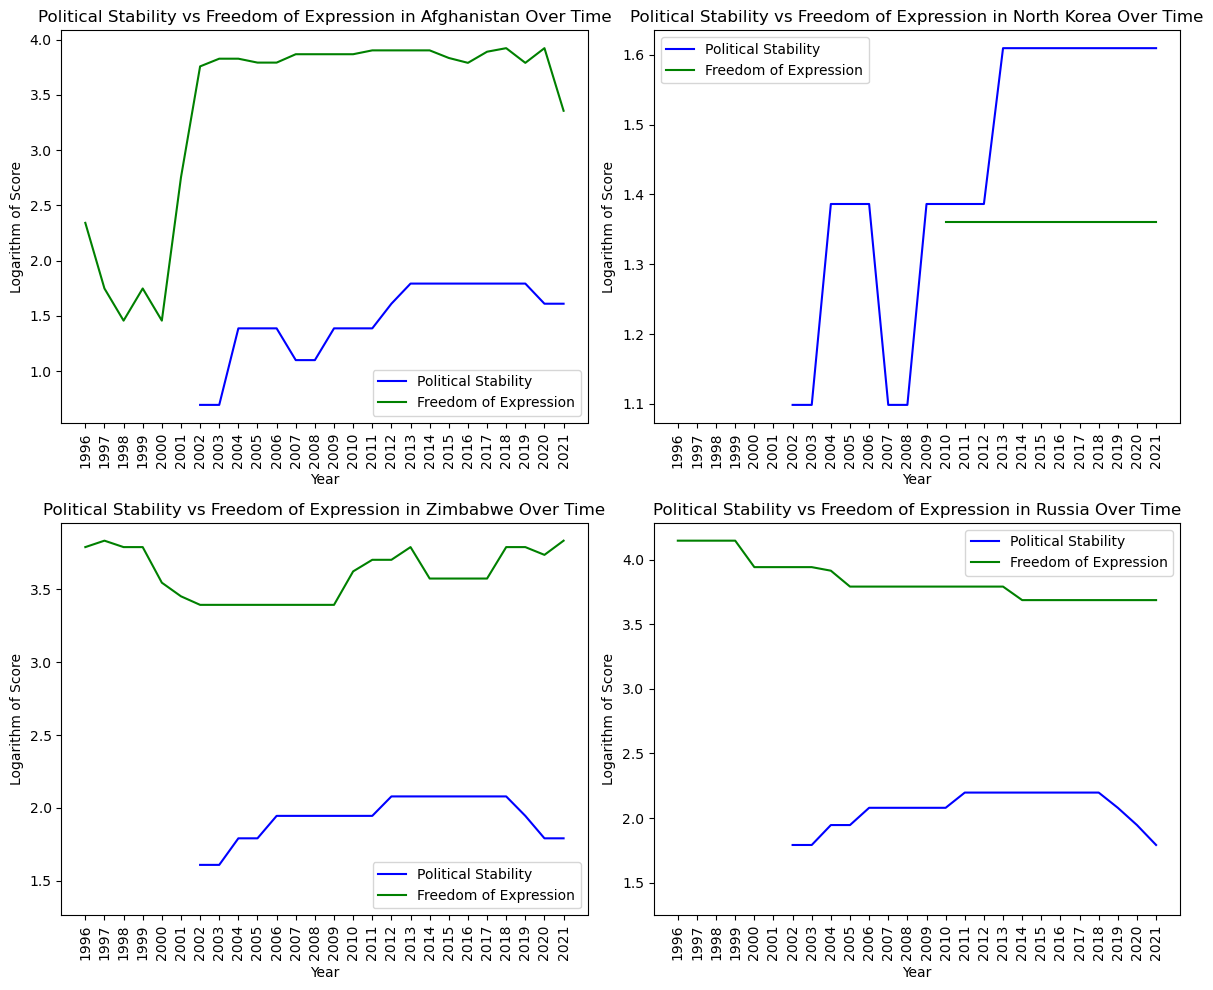

In [83]:
# List of countries
countries = ['Afghanistan', 'North Korea', 'Zimbabwe', 'Russia']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over countries and plot the trend of political stability and freedom of expression
for i, country in enumerate(countries):
    # Filter the dataset to include only data for the current country
    country_data = merged_df[merged_df['country'] == country]

    # Apply logarithm transformation to the scores
    country_data['log_political_stability'] = np.log(country_data['political_stability'])
    country_data['log_freedom_of_expression'] = np.log(country_data['freedom_of_expression'])

    # Plot the trend of political stability and freedom of expression
    row = i // 2  # Determine the row index for the subplot
    col = i % 2   # Determine the column index for the subplot
    ax = axes[row, col]  # Get the corresponding axis for the subplot
    ax.plot(country_data['year'], country_data['log_political_stability'], 
            label='Political Stability', color='blue')
    ax.plot(country_data['year'], country_data['log_freedom_of_expression'], 
            label='Freedom of Expression', color='green')

    # Set title and labels
    ax.set_title(f'Political Stability vs Freedom of Expression in {country} Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Logarithm of Score')
    ax.legend()

    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Upon analysing the trends in political stability and freedom of expression across four countries, notable patterns emerge. In Afghanistan, we observe a concurrent increase in both political stability and freedom of expression over time, with a sharp rise around 2001, potentially attributable to international intervention amidst conflict. Conversely, North Korea exhibits limited freedom of expression data due to its dictatorship regime, yet fluctuations in political stability are discernible, notably in 2003, 2006, 2008, and 2021, possibly influenced by specific political events.

In Zimbabwe, political stability shows a steady increase until 2018, followed by a decline, likely linked to the 2018 general election and subsequent political unrest. Similarly, freedom of expression in Zimbabwe decreases in 1999 but rises in 2019, corresponding with shifts in political stability during those periods. Meanwhile, in Russia, while political stability generally increases, freedom of expression declines, indicative of a controlled political landscape with censorship practices. A notable dip in political stability occurs in Russia in 2018, possibly stemming from widespread protests against Vladimir Putin's reelection.